# **PREDICT ENERGY CONSUMPTION**

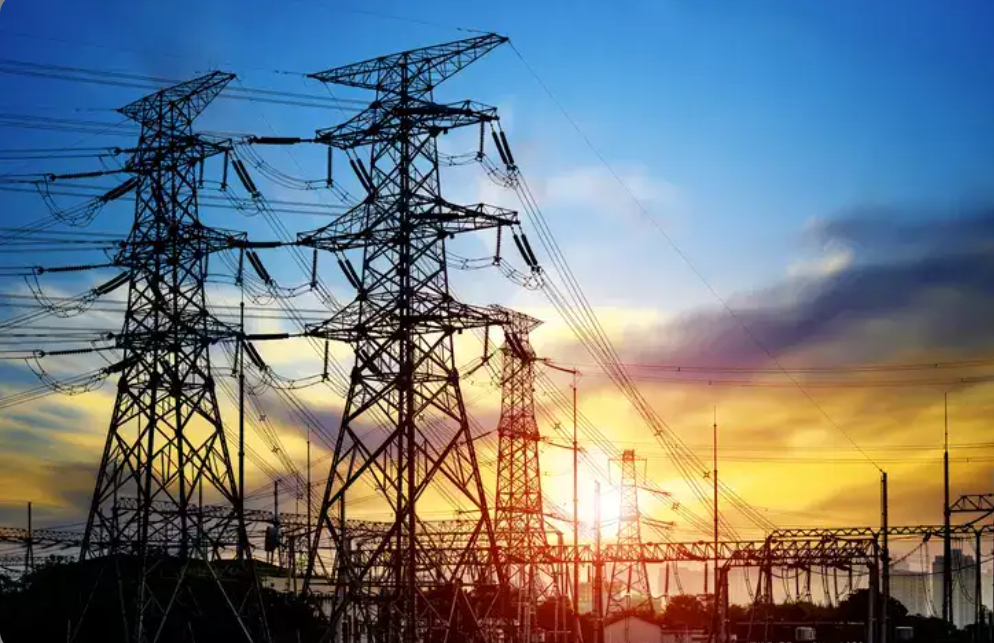


In an era where smart homes are becoming increasingly common, detailed household electricity consumption data offers immense potential for promoting sustainable energy use. Imagine living in a home where every watt of electricity is monitored and stored over time—this data, when collected over several years, becomes a powerful resource for energy companies. By applying predictive models to this extensive dataset, companies can forecast future electricity consumption patterns with high accuracy. These forecasts enable energy providers to balance power generation more effectively, reducing waste and reliance on non-renewable sources. Additionally, customers benefit from personalized insights and recommendations on how to reduce consumption, shift usage to off-peak hours, or adopt energy-efficient devices. Ultimately, this data-driven approach empowers both providers and consumers to make informed decisions that support energy conservation and long-term sustainability.

In [ ]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Energy_consumption.csv']))
print(df.head())


Saving Energy_consumption.csv to Energy_consumption.csv
          Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  01-01-2022 00:00    25.139433  43.431581    1565.693999          5   
1  01-01-2022 01:00    27.731651  54.225919    1411.064918          1   
2  01-01-2022 02:00    28.704277  58.907658    1755.715009          2   
3  01-01-2022 03:00    20.080469  50.371637    1452.316318          1   
4  01-01-2022 04:00    23.097359  51.401421    1094.130359          9   

  HVACUsage LightingUsage  RenewableEnergy  DayOfWeek Holiday  \
0        On           Off         2.774699     Monday      No   
1        On            On        21.831384   Saturday      No   
2       Off           Off         6.764672     Sunday      No   
3       Off            On         8.623447  Wednesday      No   
4        On           Off         3.071969     Friday      No   

   EnergyConsumption  
0          75.364373  
1          83.401855  
2          78.270888  
3          56.519850  

In [ ]:
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.sample(5)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
717,30-01-2022 21:00,27.997372,51.608684,1747.426437,3,On,Off,25.490113,Saturday,No,86.773219
446,19-01-2022 14:00,22.430863,54.413488,1504.029887,5,Off,On,24.674782,Thursday,No,65.171246
585,25-01-2022 09:00,23.377387,50.071091,1295.650970,8,On,Off,21.963152,Saturday,Yes,77.627146
177,08-01-2022 09:00,23.109785,53.831902,1483.871500,1,On,Off,28.162491,Tuesday,No,74.333935
802,03-02-2022 10:00,24.739662,45.583008,1668.376681,2,Off,On,20.607770,Sunday,No,71.583166


In [ ]:
df.shape

(1000, 11)

In [ ]:
# 1 data cleaning
# 2 EDA(exploratory data analysis)
# 3 Text preprocessing
# 4 model building
# 5 evaluation
# 6 Improvements
# 7 website
# 8 deploy

## 1.DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


HERE WE CONVERT TIMESTAMP TO DATE TIME BECAUSE ML MODEL CAN NOT UNDERSTAND THE DD-MM-YYYY FORM

In [ ]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)

# Extract useful datetime features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday


In [ ]:
df.head(5)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,Weekday
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,0,1,1,5
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,1,5
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2,1,1,5
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,3,1,1,5
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,4,1,1,5


CATEGORICAL VARIABLES ENCODE TO THE 0 AND 1 BECAUSE ML CAN NOT UNDERSTAND STRING IT NEEDS VALUES

In [ ]:
# Encode categorical columns
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head(5)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,Weekday
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373,0,1,1,5
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855,1,1,1,5
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888,2,1,1,5
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850,3,1,1,5
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732,4,1,1,5


## 2.EDA

In [ ]:
df.describe()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,Month,Weekday
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2022-01-21 19:29:59.999999744,24.982026,45.395412,1500.052488,4.581000,0.492000,0.491000,15.132813,2.929000,0.467000,77.055873,11.436000,13.400000,1.25600,2.992000
min,2022-01-01 00:00:00,20.007565,30.015974,1000.512661,0.000000,0.000000,0.000000,0.006642,0.000000,0.000000,53.263278,0.000000,1.000000,1.00000,0.000000
25%,2022-01-11 09:45:00,22.645070,38.297722,1247.108548,2.000000,0.000000,0.000000,7.628385,1.000000,0.000000,71.544690,5.000000,6.000000,1.00000,1.000000
50%,2022-01-21 19:30:00,24.751637,45.972116,1507.967426,5.000000,0.000000,0.000000,15.072296,3.000000,0.000000,76.943696,11.000000,11.000000,1.00000,3.000000
75%,2022-02-01 05:15:00,27.418174,52.420066,1740.340165,7.000000,1.000000,1.000000,22.884064,5.000000,1.000000,82.921742,17.000000,21.000000,2.00000,5.000000
max,2022-02-11 15:00:00,29.998671,59.969085,1999.982252,9.000000,1.000000,1.000000,29.965327,6.000000,1.000000,99.201120,23.000000,31.000000,2.00000,6.000000
std,NaN,2.836850,8.518905,288.418873,2.865598,0.500186,0.500169,8.745917,1.988948,0.499159,8.144112,6.913009,9.037792,0.43664,2.006979


In [ ]:
# Compute correlation with target
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['EnergyConsumption'].sort_values(ascending=False)
print("Correlation with EnergyConsumption:")
print(correlation_with_target)


Correlation with EnergyConsumption:
EnergyConsumption    1.000000
Temperature          0.696410
HVACUsage            0.286464
Occupancy            0.186580
LightingUsage        0.093423
RenewableEnergy      0.081160
Weekday              0.060690
Holiday              0.056676
Timestamp            0.034407
Month                0.023197
Day                  0.010825
Hour                 0.007718
SquareFootage       -0.001129
DayOfWeek           -0.002291
Humidity            -0.093583
Name: EnergyConsumption, dtype: float64


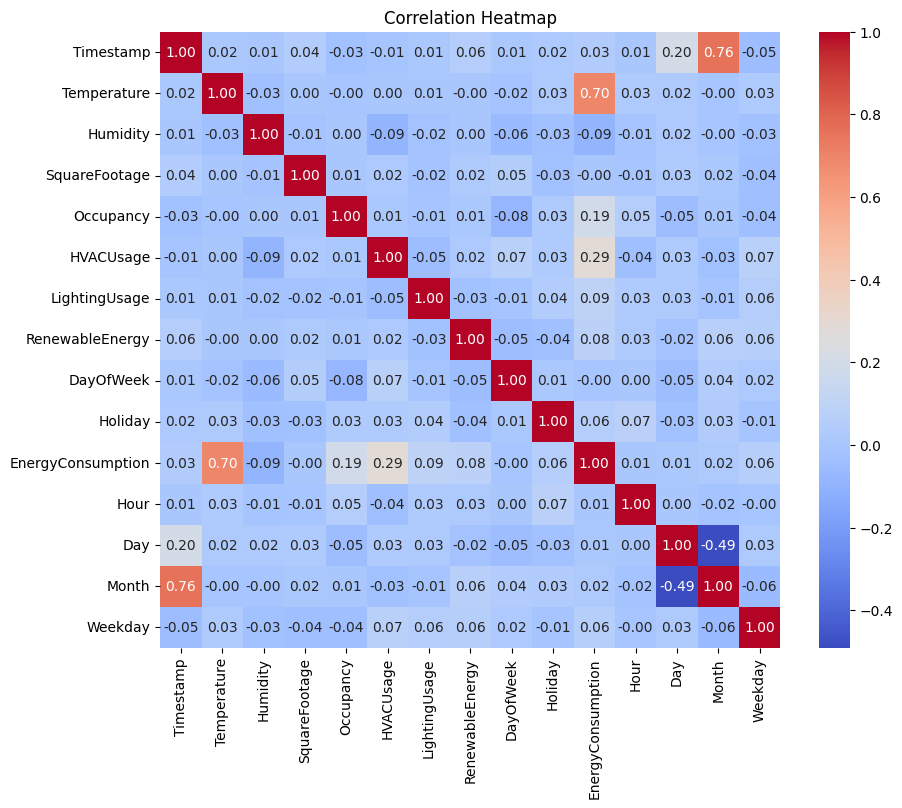

In [ ]:
# Visualize correlation matrix with heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




```
Feature	Correlation	Interpretation
Temperature- +0.70 Strong positive correlation. As temperature rises, energy consumption increases — likely due to HVAC usage. Could be a key predictor
HVACUsage-      +0.29	Moderate correlation. Makes sense as HVAC systems typically drive a large portion of energy use.
SquareFootage	+0.19	Weak-to-moderate correlation. Bigger buildings may consume more energy.
LightingUsage	+0.09	Very weak correlation — might not be a significant standalone predictor.
Occupancy	    +0.08	Very weak — surprisingly low; could suggest other systems are automated or not occupancy-driven.
Humidity	    -0.09	Slight negative — likely not significant.
Hour / Day / Month	Near-zero	These temporal features have very weak correlation — maybe useful in time series models but not strong indicators in raw correlation.

Instead of dropping right away, we could try combining features:

EffectiveUsage = Occupancy × LightingUsage
DiscomfortIndex = Temperature + Humidity

Sometimes interactions reveal more than raw features alone
```



In [ ]:
# EffectiveUsage: Combine occupancy and lighting usage
df['EffectiveUsage'] = df['Occupancy'] * df['LightingUsage']

# DiscomfortIndex: Simple additive index for discomfort (temperature + humidity)
df['DiscomfortIndex'] = df['Temperature'] + df['Humidity']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['EffectiveUsage', 'DiscomfortIndex']] = scaler.fit_transform(df[['EffectiveUsage', 'DiscomfortIndex']])


In [ ]:
print(df[['EffectiveUsage', 'DiscomfortIndex', 'EnergyConsumption']].corr())


                   EffectiveUsage  DiscomfortIndex  EnergyConsumption
EffectiveUsage           1.000000        -0.008842           0.150007
DiscomfortIndex         -0.008842         1.000000           0.132600
EnergyConsumption        0.150007         0.132600           1.000000


Here we can see that corelation of effectiveusage and discomfortindex with energy consumption is higher than individual feature

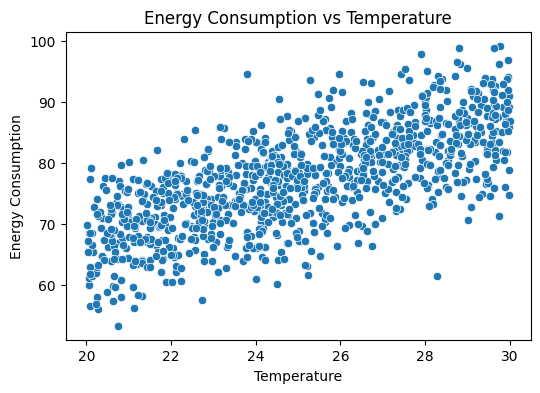

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature', y='EnergyConsumption', data=df)
plt.title("Energy Consumption vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.show()

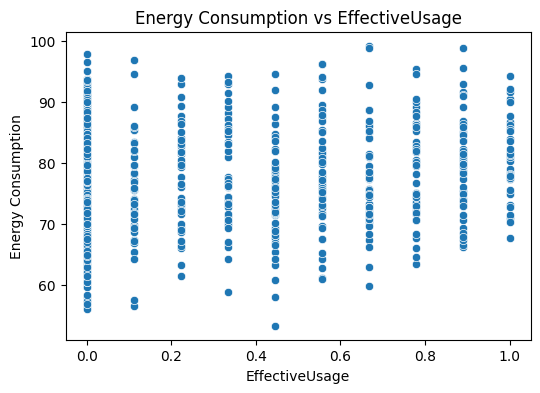

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='EffectiveUsage', y='EnergyConsumption', data=df)
plt.title("Energy Consumption vs EffectiveUsage")
plt.xlabel("EffectiveUsage")
plt.ylabel("Energy Consumption")
plt.show()

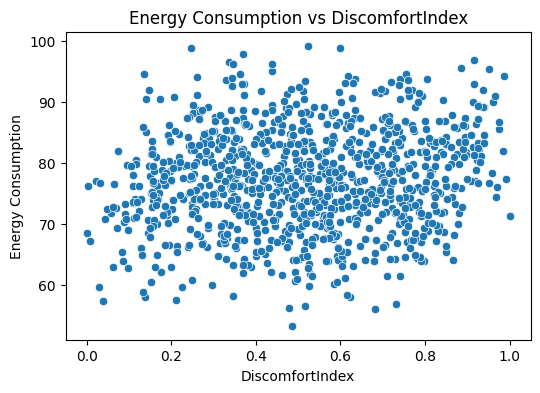

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DiscomfortIndex', y='EnergyConsumption', data=df)
plt.title("Energy Consumption vs DiscomfortIndex")
plt.xlabel("DiscomfortIndex")
plt.ylabel("Energy Consumption")
plt.show()

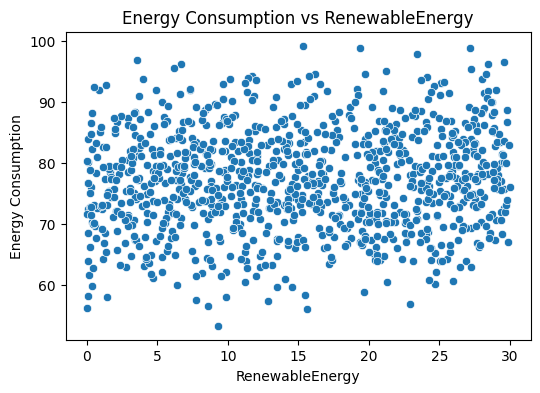

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RenewableEnergy', y='EnergyConsumption', data=df)
plt.title("Energy Consumption vs RenewableEnergy")
plt.xlabel("RenewableEnergy")
plt.ylabel("Energy Consumption")
plt.show()

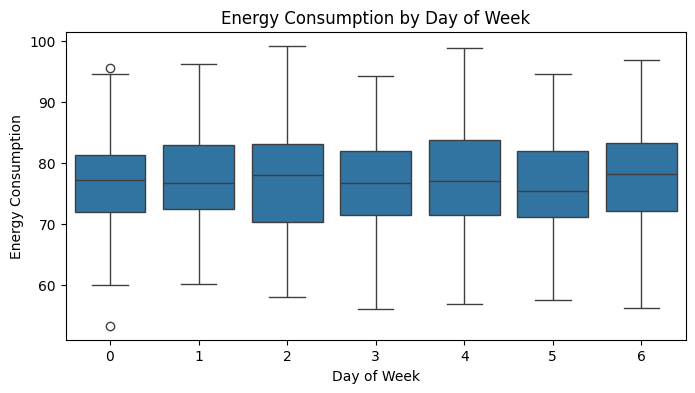

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='DayOfWeek', y='EnergyConsumption', data=df)
plt.title("Energy Consumption by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumption")
plt.show()

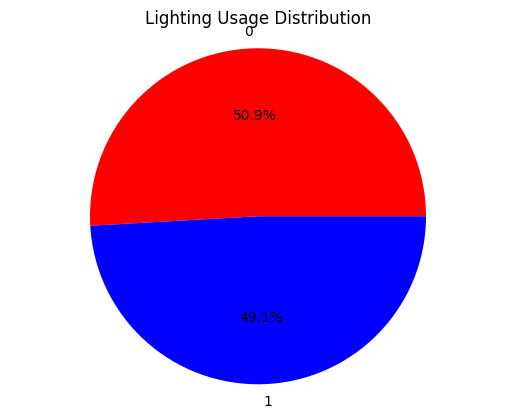

,count
LightingUsage,
0,509
1,491


In [ ]:
hvac_counts = df['LightingUsage'].value_counts()
plt.pie(hvac_counts, labels=hvac_counts.index, autopct='%1.1f%%', colors=['red', 'blue'])
plt.title("Lighting Usage Distribution")
plt.axis('equal')
plt.show()
df['LightingUsage'].value_counts()

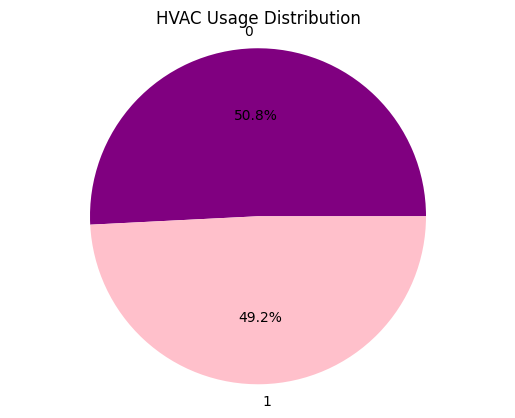

,count
HVACUsage,
0,508
1,492


In [ ]:

hvac_counts = df['HVACUsage'].value_counts()
plt.pie(hvac_counts, labels=hvac_counts.index, autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title("HVAC Usage Distribution")
plt.axis('equal')
plt.show()
df['HVACUsage'].value_counts()

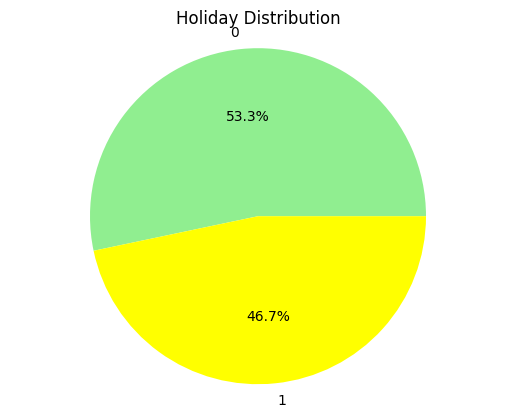

,count
Holiday,
0,533
1,467


In [ ]:
hvac_counts = df['Holiday'].value_counts()
plt.pie(hvac_counts, labels=hvac_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'yellow'])
plt.title("Holiday Distribution")
plt.axis('equal')
plt.show()
df['Holiday'].value_counts()

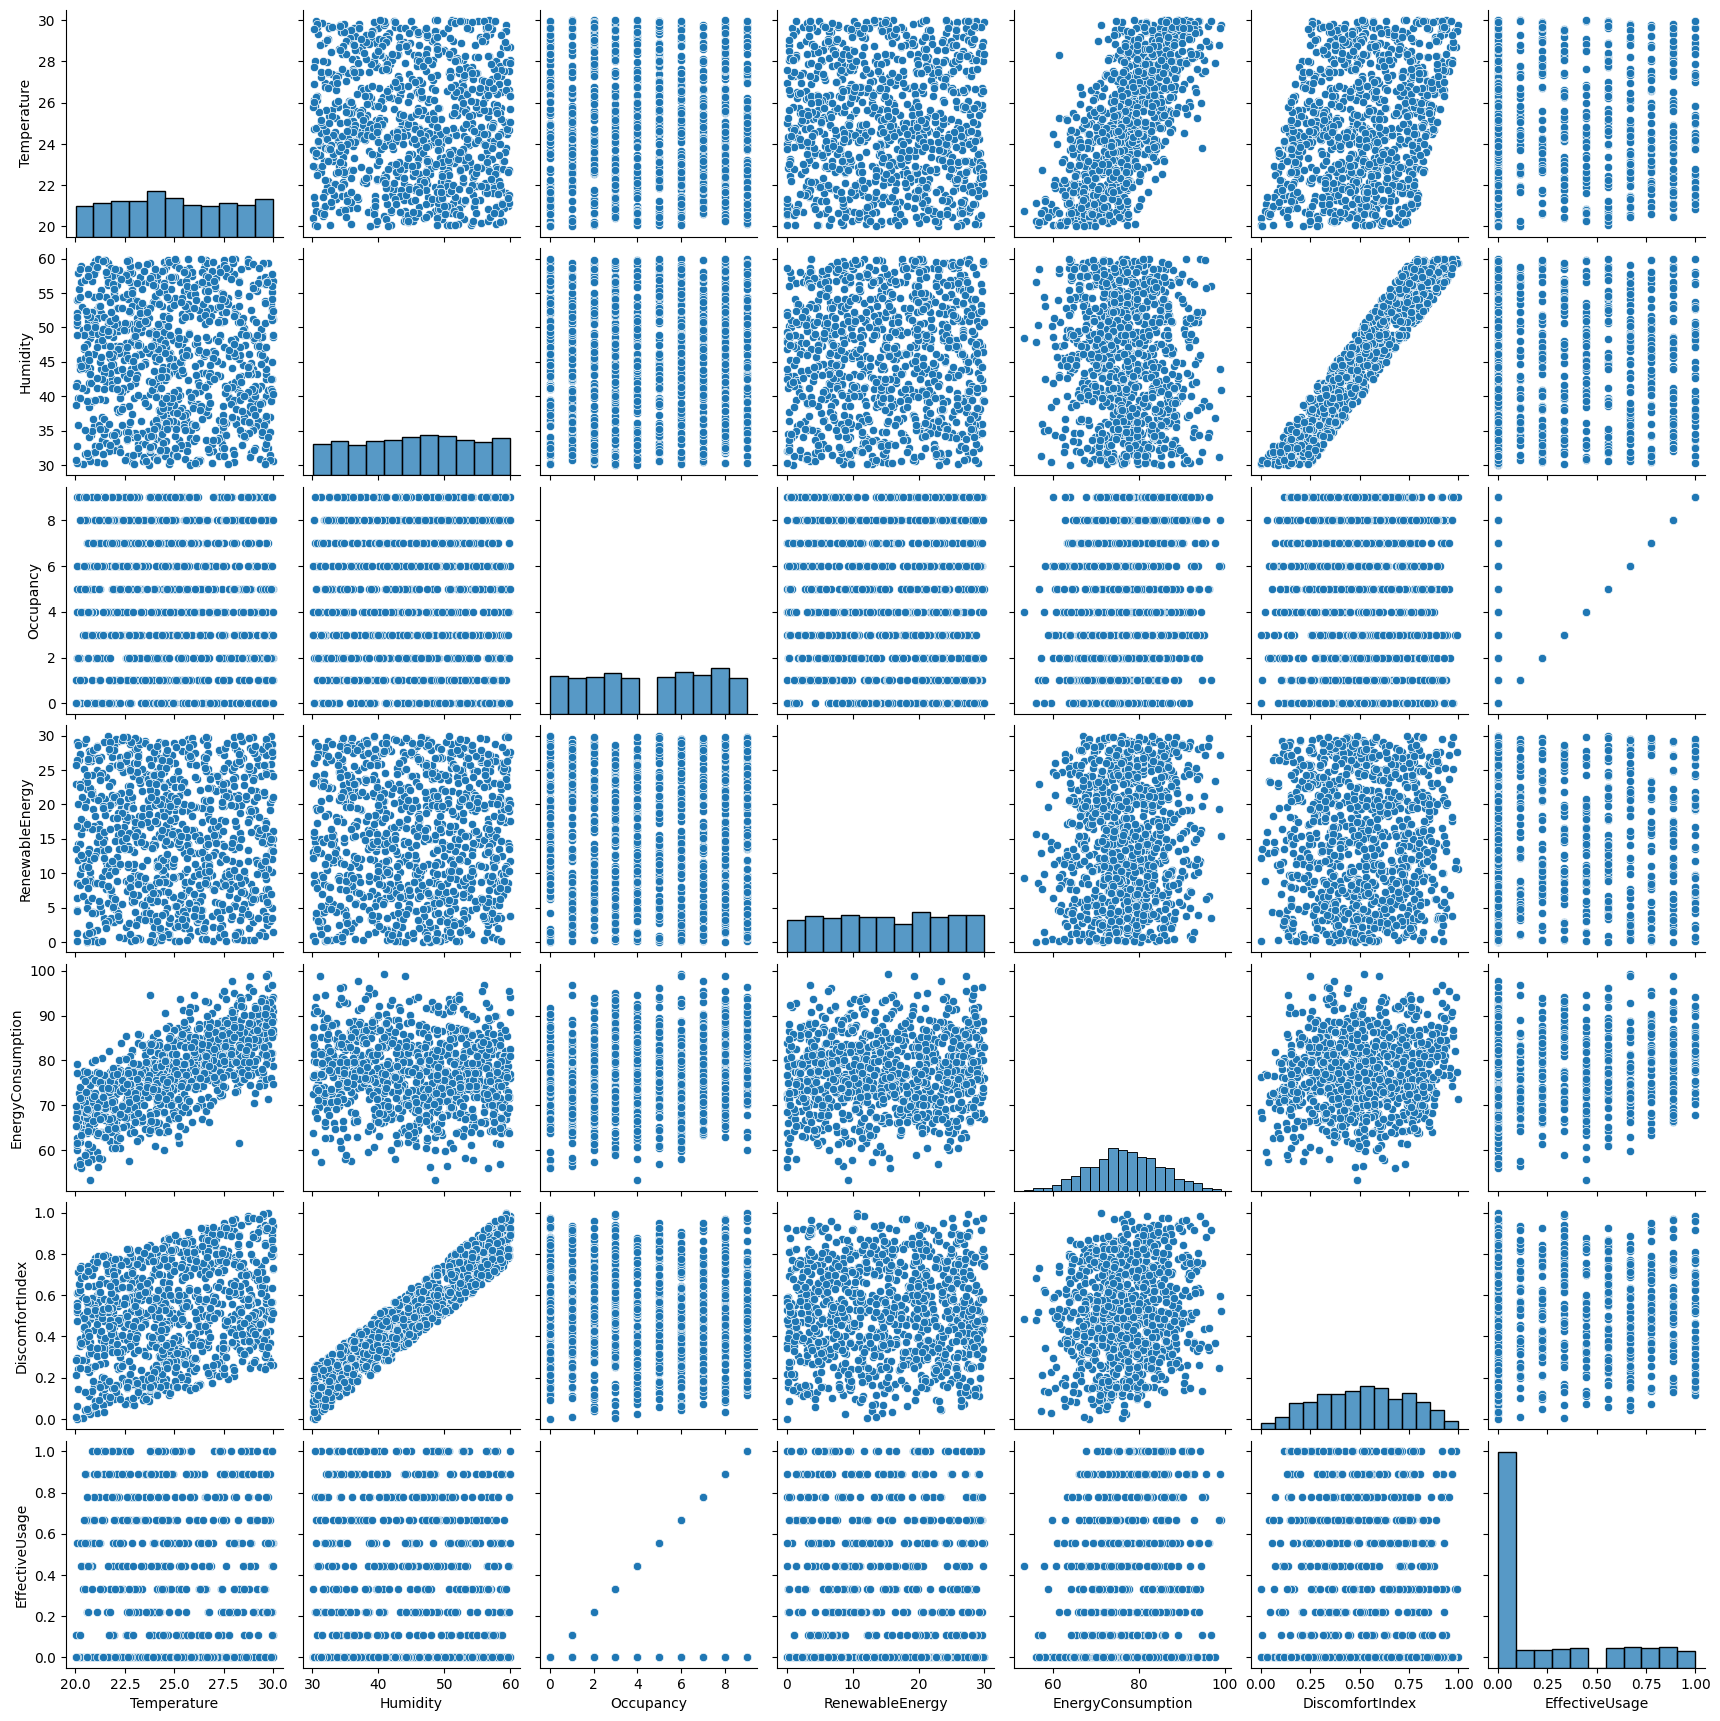

In [ ]:
# Pairplot for multiple numeric relationships
sns.pairplot(df, vars=['Temperature', 'Humidity', 'Occupancy', 'RenewableEnergy', 'EnergyConsumption','DiscomfortIndex','EffectiveUsage'])
plt.show()


## 3. MODEL BUILDING

## a. Importing Required Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## b. Feature Setup

In [ ]:
# Basic features
features_basic = ['Temperature', 'HVACUsage', 'SquareFootage']

# Add new interaction features
features_extended = features_basic + ['EffectiveUsage', 'DiscomfortIndex']

# Define target
y = df['EnergyConsumption']
X_basic = df[features_basic]
X_extended = df[features_extended]


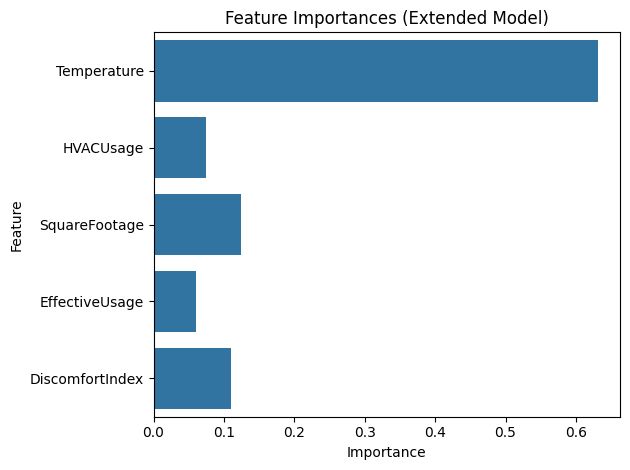

In [ ]:
import seaborn as sns

# Feature importance for extended model
importances = rf_extended.feature_importances_
feat_names = X_extended.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances (Extended Model)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## c. Train and test  

In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_basic, y, test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_extended, y, test_size=0.2, random_state=42)


In [ ]:
# Basic model
rf_basic = RandomForestRegressor(random_state=42)
rf_basic.fit(X_train_b, y_train_b)

# Extended model
rf_extended = RandomForestRegressor(random_state=42)
rf_extended.fit(X_train_e, y_train_e)


RandomForestRegressor(random_state=42)

## d. Evaluation

In [ ]:
# Predict
y_pred_b = rf_basic.predict(X_test_b)
y_pred_e = rf_extended.predict(X_test_e)

# Evaluate
print("🔹 Basic Model:")
print("R²:", r2_score(y_test_b, y_pred_b))
print("MSE:", mean_squared_error(y_test_b, y_pred_b))

print("\n🔸 Extended Model (with EffectiveUsage & DiscomfortIndex):")
print("R²:", r2_score(y_test_e, y_pred_e))
print("MSE:", mean_squared_error(y_test_e, y_pred_e))


🔹 Basic Model:
R²: 0.42766760889009636
MSE: 37.48770038200043

🔸 Extended Model (with EffectiveUsage & DiscomfortIndex):
R²: 0.4980162713141968
MSE: 32.8798717492108


In [ ]:
!pip install xgboost
import xgboost as xgb

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_e, y_train_e)
y_pred_xgb = xgb_model.predict(X_test_e)

print("🔸 XGBoost Model:")
print("R²:", r2_score(y_test_e, y_pred_xgb))
print("MSE:", mean_squared_error(y_test_e, y_pred_xgb))


🔸 XGBoost Model:
R²: 0.4398680379555815
MSE: 36.68857379674496


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_extended, y, cv=5, scoring='r2')
print("XGBoost Cross-Validated R² Scores:", scores)
print("Average R²:", scores.mean())


XGBoost Cross-Validated R² Scores: [0.52026814 0.58108453 0.43792967 0.3840347  0.49242234]
Average R²: 0.4831478773797911


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_extended, y)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best R² Score: 0.540044771558417


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f" - MAE:  {mae:.3f}")
    print(f" - RMSE: {rmse:.3f}")
    print(f" - R²:   {r2:.3f}\n")

# Evaluate all models
evaluate_model("Random Forest (Basic)", y_test_b, y_pred_b)
evaluate_model("Random Forest (Extended)", y_test_e, y_pred_e)
evaluate_model("XGBoost (Extended)", y_test_e, y_pred_xgb)


Random Forest (Basic) Performance:
 - MAE:  4.885
 - RMSE: 6.123
 - R²:   0.428

Random Forest (Extended) Performance:
 - MAE:  4.569
 - RMSE: 5.734
 - R²:   0.498

XGBoost (Extended) Performance:
 - MAE:  4.888
 - RMSE: 6.057
 - R²:   0.440



Metric	Goal
```
MAE ↓	Lower is better
RMSE ↓	Lower is better
R² ↑	Closer to 1 is better
```
Thus random forest (extended) performed best among three

SAVE THE MODEL FOR FURTHER USE

In [ ]:
import joblib
joblib.dump(rf_extended, 'random_forest_extended_model.pkl')


['random_forest_extended_model.pkl']